In [3]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [4]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [5]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [6]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   1   2   3   6   9  10  11  12  13  14  15  16  17  19  20  21  22
  23  25  27  28  29  31  32  34  35  36  38  39  40  41  42  43  46  47
  48  49  50  51  52  53  54  57  58  59  61  62  64  65  67  68  69  70
  72  73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  91  92
  93  96  97  98  99 100 102 103 104 105 107 110 112 114 115 117 118 119
 120 121 122 125 126 127 128 129 130 132 133 135 137 139 140 141 142 144
 145 146 147 148 149 151 152 153 154 155 157 158 159 160 162 163 164 165
 166 167 169 172 174 176 177 178 180 181 182 183 185 187 188] TEST: [  4   5   7   8  18  24  26  30  33  37  44  45  55  56  60  63  66  71
  74  89  90  94  95 101 106 108 109 111 113 116 123 124 131 134 136 138
 143 150 156 161 168 170 171 173 175 179 184 186]
TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  18  20  21
  23  24  25  26  28  29  30  31  32  33  34  35  36  37  38  39  41  42
  44  45  47  48  49  52  53  55  56  57  58  60  63  64  65  66 

## XGBoost

In [7]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=5,
                      seed=82)

In [8]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[10:21:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.00000	validation_0-mlogloss:1.09184	validation_1-merror:0.00000	validation_1-mlogloss:1.09179
[1]	validation_0-merror:0.00000	validation_0-mlogloss:1.08515	validation_1-merror:0.00000	validation_1-mlogloss:1.08506
[2]	validation_0-merror:0.02817	validation_0-mlogloss:1.07922	validation_1-merror:0.02128	validation_1-mlogloss:1.07884
[3]	validation_0-merror:0.02817	validation_0-mlogloss:1.07389	validation_1-merror:0.04255	validation_1-mlogloss:1.07350
[4]	validation_0-merror:0.02817	validation_0-mlogloss:1.06813	validation_1-merror:0.04255	validation_1-mlogloss:1.06771
[5]	validation_0-merror:0.02817	validation_

[65]	validation_0-merror:0.00000	validation_0-mlogloss:0.77557	validation_1-merror:0.02128	validation_1-mlogloss:0.77299
[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.77140	validation_1-merror:0.02128	validation_1-mlogloss:0.76880
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.76885	validation_1-merror:0.02128	validation_1-mlogloss:0.76624
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.76557	validation_1-merror:0.02128	validation_1-mlogloss:0.76289
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.76267	validation_1-merror:0.02128	validation_1-mlogloss:0.75996
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.75918	validation_1-merror:0.02128	validation_1-mlogloss:0.75654
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.75482	validation_1-merror:0.02128	validation_1-mlogloss:0.75234
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.75079	validation_1-merror:0.02128	validation_1-mlogloss:0.74829
[73]	validation_0-merror:0.00000

[133]	validation_0-merror:0.00000	validation_0-mlogloss:0.56085	validation_1-merror:0.02128	validation_1-mlogloss:0.55846
[134]	validation_0-merror:0.00000	validation_0-mlogloss:0.55810	validation_1-merror:0.02128	validation_1-mlogloss:0.55570
[135]	validation_0-merror:0.00000	validation_0-mlogloss:0.55575	validation_1-merror:0.02128	validation_1-mlogloss:0.55330
[136]	validation_0-merror:0.00000	validation_0-mlogloss:0.55424	validation_1-merror:0.02128	validation_1-mlogloss:0.55177
[137]	validation_0-merror:0.00000	validation_0-mlogloss:0.55212	validation_1-merror:0.02128	validation_1-mlogloss:0.54958
[138]	validation_0-merror:0.00000	validation_0-mlogloss:0.55072	validation_1-merror:0.02128	validation_1-mlogloss:0.54816
[139]	validation_0-merror:0.00000	validation_0-mlogloss:0.54803	validation_1-merror:0.02128	validation_1-mlogloss:0.54545
[140]	validation_0-merror:0.00000	validation_0-mlogloss:0.54596	validation_1-merror:0.02128	validation_1-mlogloss:0.54334
[141]	validation_0-merro

[201]	validation_0-merror:0.00000	validation_0-mlogloss:0.42580	validation_1-merror:0.02128	validation_1-mlogloss:0.42277
[202]	validation_0-merror:0.00000	validation_0-mlogloss:0.42388	validation_1-merror:0.02128	validation_1-mlogloss:0.42085
[203]	validation_0-merror:0.00000	validation_0-mlogloss:0.42249	validation_1-merror:0.02128	validation_1-mlogloss:0.41946
[204]	validation_0-merror:0.00000	validation_0-mlogloss:0.42023	validation_1-merror:0.02128	validation_1-mlogloss:0.41722
[205]	validation_0-merror:0.00000	validation_0-mlogloss:0.41833	validation_1-merror:0.02128	validation_1-mlogloss:0.41532
[206]	validation_0-merror:0.00000	validation_0-mlogloss:0.41643	validation_1-merror:0.02128	validation_1-mlogloss:0.41341
[207]	validation_0-merror:0.00000	validation_0-mlogloss:0.41531	validation_1-merror:0.02128	validation_1-mlogloss:0.41229
[208]	validation_0-merror:0.00000	validation_0-mlogloss:0.41344	validation_1-merror:0.02128	validation_1-mlogloss:0.41041
[209]	validation_0-merro

[269]	validation_0-merror:0.00000	validation_0-mlogloss:0.32731	validation_1-merror:0.02128	validation_1-mlogloss:0.32500
[270]	validation_0-merror:0.00000	validation_0-mlogloss:0.32594	validation_1-merror:0.02128	validation_1-mlogloss:0.32363
[271]	validation_0-merror:0.00000	validation_0-mlogloss:0.32458	validation_1-merror:0.02128	validation_1-mlogloss:0.32227
[272]	validation_0-merror:0.00000	validation_0-mlogloss:0.32433	validation_1-merror:0.02128	validation_1-mlogloss:0.32200
[273]	validation_0-merror:0.00000	validation_0-mlogloss:0.32388	validation_1-merror:0.02128	validation_1-mlogloss:0.32154
[274]	validation_0-merror:0.00000	validation_0-mlogloss:0.32253	validation_1-merror:0.02128	validation_1-mlogloss:0.32019
[275]	validation_0-merror:0.00000	validation_0-mlogloss:0.32175	validation_1-merror:0.02128	validation_1-mlogloss:0.31941
[276]	validation_0-merror:0.00000	validation_0-mlogloss:0.32039	validation_1-merror:0.02128	validation_1-mlogloss:0.31805
[277]	validation_0-merro

[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.25998	validation_1-merror:0.02128	validation_1-mlogloss:0.25766
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.25983	validation_1-merror:0.02128	validation_1-mlogloss:0.25751
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.25925	validation_1-merror:0.02128	validation_1-mlogloss:0.25692
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.25794	validation_1-merror:0.02128	validation_1-mlogloss:0.25563
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.25693	validation_1-merror:0.02128	validation_1-mlogloss:0.25463
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.25593	validation_1-merror:0.02128	validation_1-mlogloss:0.25362
[343]	validation_0-merror:0.00000	validation_0-mlogloss:0.25535	validation_1-merror:0.02128	validation_1-mlogloss:0.25304
[344]	validation_0-merror:0.00000	validation_0-mlogloss:0.25437	validation_1-merror:0.02128	validation_1-mlogloss:0.25206
[345]	validation_0-merro

[405]	validation_0-merror:0.00000	validation_0-mlogloss:0.21585	validation_1-merror:0.02128	validation_1-mlogloss:0.21349
[406]	validation_0-merror:0.00000	validation_0-mlogloss:0.21541	validation_1-merror:0.02128	validation_1-mlogloss:0.21305
[407]	validation_0-merror:0.00000	validation_0-mlogloss:0.21462	validation_1-merror:0.02128	validation_1-mlogloss:0.21227
[408]	validation_0-merror:0.00000	validation_0-mlogloss:0.21384	validation_1-merror:0.02128	validation_1-mlogloss:0.21149
[409]	validation_0-merror:0.00000	validation_0-mlogloss:0.21342	validation_1-merror:0.02128	validation_1-mlogloss:0.21106
[410]	validation_0-merror:0.00000	validation_0-mlogloss:0.21300	validation_1-merror:0.02128	validation_1-mlogloss:0.21065
[411]	validation_0-merror:0.00000	validation_0-mlogloss:0.21257	validation_1-merror:0.02128	validation_1-mlogloss:0.21021
[412]	validation_0-merror:0.00000	validation_0-mlogloss:0.21179	validation_1-merror:0.02128	validation_1-mlogloss:0.20944
[413]	validation_0-merro

[473]	validation_0-merror:0.00000	validation_0-mlogloss:0.17998	validation_1-merror:0.02128	validation_1-mlogloss:0.17769
[474]	validation_0-merror:0.00000	validation_0-mlogloss:0.17937	validation_1-merror:0.02128	validation_1-mlogloss:0.17708
[475]	validation_0-merror:0.00000	validation_0-mlogloss:0.17904	validation_1-merror:0.02128	validation_1-mlogloss:0.17675
[476]	validation_0-merror:0.00000	validation_0-mlogloss:0.17844	validation_1-merror:0.02128	validation_1-mlogloss:0.17617
[477]	validation_0-merror:0.00000	validation_0-mlogloss:0.17811	validation_1-merror:0.00000	validation_1-mlogloss:0.17583
[478]	validation_0-merror:0.00000	validation_0-mlogloss:0.17750	validation_1-merror:0.00000	validation_1-mlogloss:0.17523
[479]	validation_0-merror:0.00000	validation_0-mlogloss:0.17690	validation_1-merror:0.00000	validation_1-mlogloss:0.17464
[480]	validation_0-merror:0.00000	validation_0-mlogloss:0.17630	validation_1-merror:0.00000	validation_1-mlogloss:0.17404
[481]	validation_0-merro

[541]	validation_0-merror:0.00000	validation_0-mlogloss:0.15344	validation_1-merror:0.00000	validation_1-mlogloss:0.15124
[542]	validation_0-merror:0.00000	validation_0-mlogloss:0.15294	validation_1-merror:0.00000	validation_1-mlogloss:0.15074
[543]	validation_0-merror:0.00000	validation_0-mlogloss:0.15291	validation_1-merror:0.00000	validation_1-mlogloss:0.15070
[544]	validation_0-merror:0.00000	validation_0-mlogloss:0.15264	validation_1-merror:0.00000	validation_1-mlogloss:0.15044
[545]	validation_0-merror:0.00000	validation_0-mlogloss:0.15238	validation_1-merror:0.00000	validation_1-mlogloss:0.15018
[546]	validation_0-merror:0.00000	validation_0-mlogloss:0.15213	validation_1-merror:0.00000	validation_1-mlogloss:0.14993
[547]	validation_0-merror:0.00000	validation_0-mlogloss:0.15210	validation_1-merror:0.00000	validation_1-mlogloss:0.14990
[548]	validation_0-merror:0.00000	validation_0-mlogloss:0.15207	validation_1-merror:0.00000	validation_1-mlogloss:0.14986
[549]	validation_0-merro

[609]	validation_0-merror:0.00000	validation_0-mlogloss:0.14441	validation_1-merror:0.00000	validation_1-mlogloss:0.14208
[610]	validation_0-merror:0.00000	validation_0-mlogloss:0.14439	validation_1-merror:0.00000	validation_1-mlogloss:0.14205
[611]	validation_0-merror:0.00000	validation_0-mlogloss:0.14437	validation_1-merror:0.00000	validation_1-mlogloss:0.14203
[612]	validation_0-merror:0.00000	validation_0-mlogloss:0.14413	validation_1-merror:0.00000	validation_1-mlogloss:0.14179
[613]	validation_0-merror:0.00000	validation_0-mlogloss:0.14412	validation_1-merror:0.00000	validation_1-mlogloss:0.14177
[614]	validation_0-merror:0.00000	validation_0-mlogloss:0.14410	validation_1-merror:0.00000	validation_1-mlogloss:0.14175
[615]	validation_0-merror:0.00000	validation_0-mlogloss:0.14386	validation_1-merror:0.00000	validation_1-mlogloss:0.14151
[616]	validation_0-merror:0.00000	validation_0-mlogloss:0.14384	validation_1-merror:0.00000	validation_1-mlogloss:0.14148
[617]	validation_0-merro

[677]	validation_0-merror:0.00000	validation_0-mlogloss:0.14013	validation_1-merror:0.02128	validation_1-mlogloss:0.13761
[678]	validation_0-merror:0.00000	validation_0-mlogloss:0.14011	validation_1-merror:0.02128	validation_1-mlogloss:0.13759
[679]	validation_0-merror:0.00000	validation_0-mlogloss:0.14009	validation_1-merror:0.02128	validation_1-mlogloss:0.13757
[680]	validation_0-merror:0.00000	validation_0-mlogloss:0.14008	validation_1-merror:0.02128	validation_1-mlogloss:0.13756
[681]	validation_0-merror:0.00000	validation_0-mlogloss:0.14005	validation_1-merror:0.02128	validation_1-mlogloss:0.13753
[682]	validation_0-merror:0.00000	validation_0-mlogloss:0.14004	validation_1-merror:0.02128	validation_1-mlogloss:0.13750
[683]	validation_0-merror:0.00000	validation_0-mlogloss:0.14002	validation_1-merror:0.02128	validation_1-mlogloss:0.13749
[684]	validation_0-merror:0.00000	validation_0-mlogloss:0.14001	validation_1-merror:0.02128	validation_1-mlogloss:0.13748
[685]	validation_0-merro

[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.13849	validation_1-merror:0.02128	validation_1-mlogloss:0.13583
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.13823	validation_1-merror:0.02128	validation_1-mlogloss:0.13558
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.13822	validation_1-merror:0.02128	validation_1-mlogloss:0.13557
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.13822	validation_1-merror:0.02128	validation_1-mlogloss:0.13556
[749]	validation_0-merror:0.00000	validation_0-mlogloss:0.13820	validation_1-merror:0.02128	validation_1-mlogloss:0.13555
[750]	validation_0-merror:0.00000	validation_0-mlogloss:0.13820	validation_1-merror:0.02128	validation_1-mlogloss:0.13554
[751]	validation_0-merror:0.00000	validation_0-mlogloss:0.13819	validation_1-merror:0.02128	validation_1-mlogloss:0.13553
[752]	validation_0-merror:0.00000	validation_0-mlogloss:0.13818	validation_1-merror:0.02128	validation_1-mlogloss:0.13552
[753]	validation_0-merro

[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.13722	validation_1-merror:0.02128	validation_1-mlogloss:0.13443
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.13721	validation_1-merror:0.02128	validation_1-mlogloss:0.13441
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.13720	validation_1-merror:0.02128	validation_1-mlogloss:0.13441
[816]	validation_0-merror:0.00000	validation_0-mlogloss:0.13720	validation_1-merror:0.02128	validation_1-mlogloss:0.13440
[817]	validation_0-merror:0.00000	validation_0-mlogloss:0.13719	validation_1-merror:0.02128	validation_1-mlogloss:0.13439
[818]	validation_0-merror:0.00000	validation_0-mlogloss:0.13719	validation_1-merror:0.02128	validation_1-mlogloss:0.13439
[819]	validation_0-merror:0.00000	validation_0-mlogloss:0.13718	validation_1-merror:0.02128	validation_1-mlogloss:0.13438
[820]	validation_0-merror:0.00000	validation_0-mlogloss:0.13717	validation_1-merror:0.02128	validation_1-mlogloss:0.13437
[821]	validation_0-merro

[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.13661	validation_1-merror:0.02128	validation_1-mlogloss:0.13370
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.13661	validation_1-merror:0.02128	validation_1-mlogloss:0.13370
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.13661	validation_1-merror:0.02128	validation_1-mlogloss:0.13370
[884]	validation_0-merror:0.00000	validation_0-mlogloss:0.13660	validation_1-merror:0.02128	validation_1-mlogloss:0.13370
[885]	validation_0-merror:0.00000	validation_0-mlogloss:0.13659	validation_1-merror:0.02128	validation_1-mlogloss:0.13368
[886]	validation_0-merror:0.00000	validation_0-mlogloss:0.13659	validation_1-merror:0.02128	validation_1-mlogloss:0.13367
[887]	validation_0-merror:0.00000	validation_0-mlogloss:0.13659	validation_1-merror:0.02128	validation_1-mlogloss:0.13367
[888]	validation_0-merror:0.00000	validation_0-mlogloss:0.13658	validation_1-merror:0.02128	validation_1-mlogloss:0.13365
[889]	validation_0-merro

[949]	validation_0-merror:0.00704	validation_0-mlogloss:0.13573	validation_1-merror:0.02128	validation_1-mlogloss:0.13273
[950]	validation_0-merror:0.00704	validation_0-mlogloss:0.13573	validation_1-merror:0.02128	validation_1-mlogloss:0.13273
[951]	validation_0-merror:0.00704	validation_0-mlogloss:0.13573	validation_1-merror:0.02128	validation_1-mlogloss:0.13272
[952]	validation_0-merror:0.00704	validation_0-mlogloss:0.13573	validation_1-merror:0.02128	validation_1-mlogloss:0.13272
[953]	validation_0-merror:0.00704	validation_0-mlogloss:0.13573	validation_1-merror:0.02128	validation_1-mlogloss:0.13272
[954]	validation_0-merror:0.00704	validation_0-mlogloss:0.13573	validation_1-merror:0.02128	validation_1-mlogloss:0.13272
[955]	validation_0-merror:0.00704	validation_0-mlogloss:0.13572	validation_1-merror:0.02128	validation_1-mlogloss:0.13271
[956]	validation_0-merror:0.00704	validation_0-mlogloss:0.13572	validation_1-merror:0.02128	validation_1-mlogloss:0.13270
[957]	validation_0-merro

In [9]:
y_pred.shape

(47,)

In [10]:
pd.Series(y_pred).value_counts()

3.0    24
1.0    22
2.0     1
dtype: int64

## LogisticRegression

In [11]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [12]:
pd.Series(LR_y_pred).value_counts()

3.0    27
1.0    20
dtype: int64

## Comparison

In [13]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 99.30%
XGB Accuracy: 97.87%
LR train Accuracy: 92.25%
LR Accuracy: 89.36%


In [14]:
features_names = list(X_with_columns.columns)

In [15]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             18.51%
Feature Importance: ATGDIFF                             18.51%
Feature Importance: homeTeamScore.matchScore.totalScore 11.77%
Feature Importance: homeTeamScoreChart.goals            11.55%
Feature Importance: awayTeamScore.minutesInFront        10.38%
Feature Importance: homeTeamScore.minutesInFront        10.17%
Feature Importance: awayTeamScoreChart.goals            9.58%
Feature Importance: awayTeamScore.matchScore.totalScore 9.53%
Feature Importance: venue.capacity                      0.0%
Feature Importance: venue.groundDimension               0.0%
Feature Importance: venue.latitude                      0.0%
Feature Importance: venue.longitude                     0.0%
Feature Importance: round.year                          0.0%
Feature Importance: round.roundNumber                   0.0%
Feature Importance: scoreWorm                           0.0%
Feature Importance: scoreMap                            0.0%
Feature Im

In [16]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScore.matchScore.totalScore',
 'venue.capacity',
 'venue.groundDimension',
 'venue.latitude',
 'venue.longitude',
 'round.year',
 'round.roundNumber',
 'scoreWorm',
 'scoreMap',
 'homeTeamScore.rushedBehinds',
 'homeTeamScore.matchScore.behinds',
 'homeTeamScore.matchScore.superGoals',
 'awayTeamScore.rushedBehinds',
 'awayTeamScore.matchScore.behinds',
 'awayTeamScore.matchScore.superGoals',
 'weather.tempInCelsius',
 'homeTeamScoreChart.leftBehinds',
 'homeTeamScoreChart.rightBehinds',
 'homeTeamScoreChart.leftPosters',
 'homeTeamScoreChart.rightPosters',
 'homeTeamScoreChart.rushedBehinds',
 'homeTeamScoreChart.touchedBehinds',
 'awayTeamScoreChart.leftBehinds',
 'awayTeamScoreChart.rightBehinds',
 'awayTeamScoreChart.leftPosters',
 'awayTeamScoreChart.rightPosters',
 'awayTeamScoreChart.rushedBehinds',
 'awayTeamScoreChart.touchedBehinds',
 'AVGHTGDIFF',
 'AVGATGDIFF',
 'H_result_1',
 'H_result_2',
 'A_result_1',
 'A_result_2',
 'H_HTGDIFF_1',
 'H_HTGDIFF_2',
 'A_ATGDIFF_

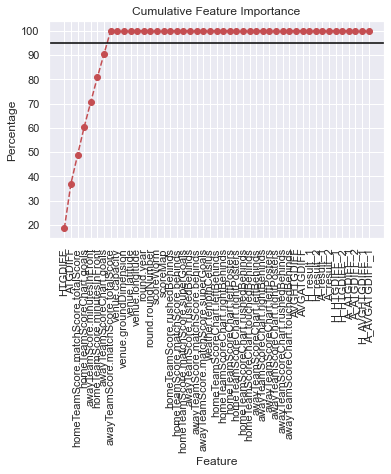

In [18]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [20]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.5 0.  0.5]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

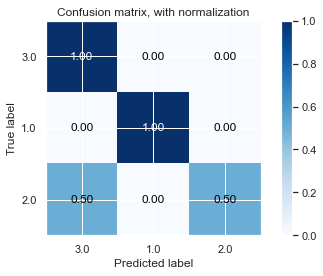

In [21]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 97.87%


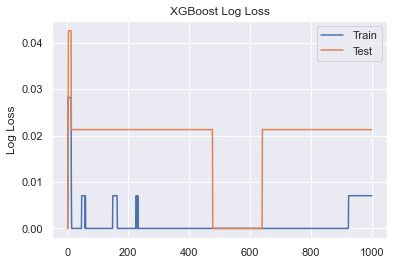

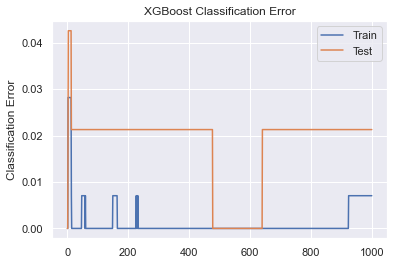

In [33]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [34]:
z_pred = XGB_model.predict(Z)

In [35]:
xgb_df_next_games = df_next_games.copy()

In [36]:
xgb_df_next_games['predicted_result'] = z_pred

In [37]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
189,Western Bulldogs,Port Adelaide,3.0
190,Richmond,Hawthorn,1.0
191,Sydney Swans,Gold Coast Suns,3.0
192,Brisbane Lions,West Coast Eagles,3.0
193,Geelong Cats,Melbourne,3.0
194,Carlton,GWS Giants,1.0
195,St Kilda,Fremantle,3.0
196,Essendon,Collingwood,3.0
197,Adelaide Crows,North Melbourne,3.0


NameError: name 'df_all' is not defined